# Controller - PID

Reference:

Lecture 8 - Control I [ [PDF](https://www.ic.unicamp.br/~esther/teaching/2019s2/mo651/Lecture%2008%20-%20ControlI.pdf) ]

In [1]:
using Robotics
using Plots
using StatsPlots
using Images
pyplot()

┌ Info: Precompiling Robotics [facd5b7b-9aee-4b35-b3b8-a081b31a0ace]
└ @ Base loading.jl:1242
┌ Info: Skipping precompilation since __precompile__(false). Importing Robotics [facd5b7b-9aee-4b35-b3b8-a081b31a0ace].
└ @ Base loading.jl:1017


Plots.PyPlotBackend()

In [2]:
robot = Robot()

Connected to remoteApi server.
Pioneer_p3dx_ultrasonicSensor1 connected.
Pioneer_p3dx_ultrasonicSensor2 connected.
Pioneer_p3dx_ultrasonicSensor3 connected.
Pioneer_p3dx_ultrasonicSensor4 connected.
Pioneer_p3dx_ultrasonicSensor5 connected.
Pioneer_p3dx_ultrasonicSensor6 connected.
Pioneer_p3dx_ultrasonicSensor7 connected.
Pioneer_p3dx_ultrasonicSensor8 connected.
Pioneer_p3dx_ultrasonicSensor9 connected.
Pioneer_p3dx_ultrasonicSensor10 connected.
Pioneer_p3dx_ultrasonicSensor11 connected.
Pioneer_p3dx_ultrasonicSensor12 connected.
Pioneer_p3dx_ultrasonicSensor13 connected.
Pioneer_p3dx_ultrasonicSensor14 connected.
Pioneer_p3dx_ultrasonicSensor15 connected.
Pioneer_p3dx_ultrasonicSensor16 connected.
Laser connected.
Vision sensor connected.
Left motor connected.
Right motor connected.
Robot connected.


Robot(0, Int32[328, 327, 326, 325, 324, 323, 322, 321, 336, 335, 334, 333, 332, 331, 330, 329], 348, 355, Dict(:left => 311,:right => 308), 307, 0.381f0, 0.0975f0)

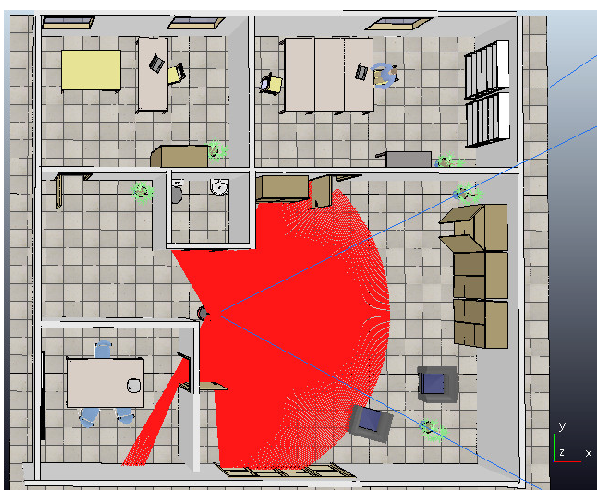

In [10]:
scene_img = load("scene_laser.jpg")

plot(scene_img, size=(600, 500),
    ticks=nothing, border=:none)

In [3]:
laser_data = read_laser(robot)

@show(laser_data[1:10])
println(length(laser_data))

laser_data[1:10] = Float32[-0.64409053, -1.1155972, 0.063000076, -2.3833568, -4.187278, 0.06300026, -2.3517127, -4.1913548, 0.06300026, -2.3113835]
1245


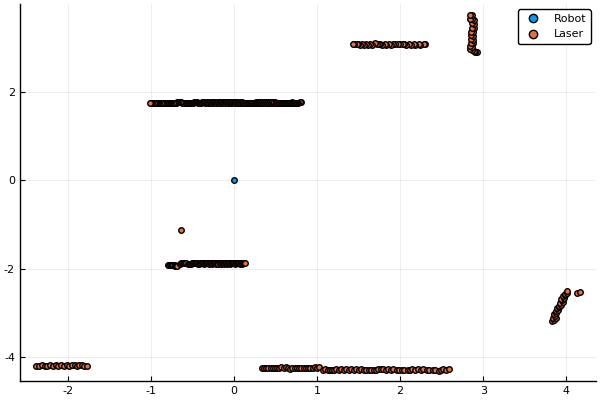

In [4]:
indices_X = 1:3:length(laser_data)
indices_Y = 2:3:length(laser_data)

laser_X = laser_data[indices_X]
laser_Y = laser_data[indices_Y]

scatter([0], [0], label="Robot")
scatter!(laser_X, laser_Y, label="Laser")

In [5]:
x, y, θ = pose2D(robot)

(-2.030462f0, -0.82524234f0, -0.0007466942f0)

In [6]:
T = T_r2g(x, y, θ)

3×3 Array{Float64,2}:
  1.0          0.000746694  -2.03046 
 -0.000746694  1.0          -0.825242
  0.0          0.0           1.0     

In [7]:
D1 = ones(eltype(laser_data), length(laser_data)÷3)

L = hcat(laser_X, laser_Y, D1)'

L

3×415 LinearAlgebra.Adjoint{Float32,Array{Float32,2}}:
 -0.644091  -2.38336  -2.35171  -2.31138  …  -0.983372  -0.996609  -1.01405
 -1.1156    -4.18728  -4.19135  -4.17942      1.75263    1.75094    1.7564 
  1.0        1.0       1.0       1.0          1.0        1.0        1.0    

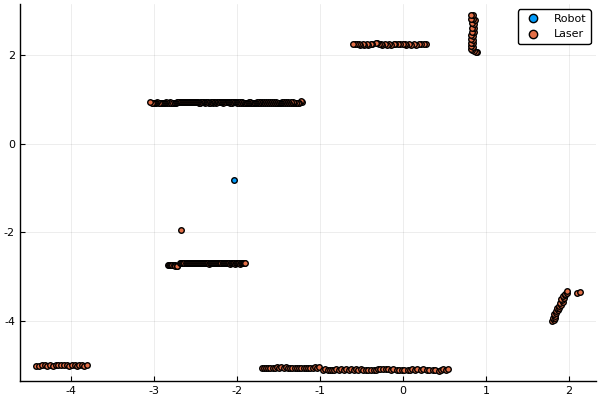

In [8]:
Lg = T * L

laser_Xg = Lg[1, :]
laser_Yg = Lg[2, :]

scatter([x], [y], label="Robot")
scatter!(laser_Xg, laser_Yg, label="Laser")

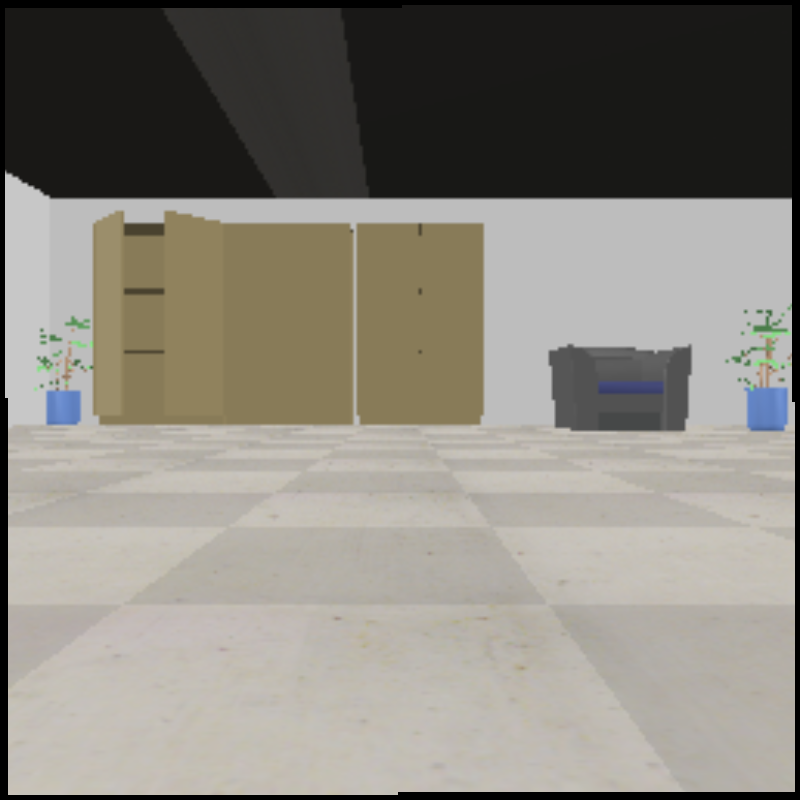

In [9]:
show_vision(robot)